CMSD Skill Check 
1. accessed all required files, renaming them to match description in the attached instructions
2. Evaluated the formatting of each table type to establish primary keys for joins
3. save first sheet of each file as a csv for easy use as a df
4. create function to iterate of the files to filter unnecasary data and join them accordingly 
5. create subset of data for visualization 



In [81]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# parts of the file names for itteration 
years = ['2015_2016', '2016_2017', '2017_2018']
years_ach = ['2015-16', '2016-17', '2017-18']
path = 'C:\\Users\\willd\\OneDrive\\Desktop\\DataAnalysis\\python data\\CMSD test\\csvs\\'
# names = ['building_achievement_', 'building_rating_', 'value_added_' ]
# columns being used from each data frame 
rat_cols = ['Building IRN', 'Building Name', 'Address', 'City, State, Zip', 'Enrollment']
ach_cols = ['Building IRN', 'Performance Index Percent']
val_cols = ['Building IRN', 'Overall Value Added Grade']

In [83]:
# Filter functio to remove other schools and colums that are not required
def filter_df(df_df, df_cols):
    df_df = df_df[df_df["District IRN"] == 43786]
    df_df = df_df[df_cols]
    return df_df

In [84]:
list_of_df = []
for i in range(len(years)):
    year = years[i]
    #new year 
    new_year = year.replace('_','-')
    
    # rating table 
    rat_df = pd.read_csv(f'{path}building_rating_{year}.csv')
    rat_df = rat_df.rename(columns={f'Enrollment {new_year}': 'Enrollment'})
    rat_df = filter_df(rat_df, rat_cols)
    rat_df['School Year'] = new_year
    rat_df['Year Rank'] = (i+1)
    rat_df['full_address'] = rat_df['Address'] + ', ' + rat_df['City, State, Zip']
    
    # achievement table 
    ach_df = pd.read_csv(f'{path}building_achievement_{year}.csv')
    ach_df = ach_df.rename(columns={f'Performance Index Percent {years_ach[i]}': 'Performance Index Percent'})
    ach_df = filter_df(ach_df, ach_cols)
    
    #value added table
    val_df = pd.read_csv(f'{path}value_added_{year}.csv')
    val_df = filter_df(val_df, val_cols)
    
    #joining the tables
    joined_df = rat_df.join(ach_df.set_index('Building IRN'), on='Building IRN')
    joined_df = joined_df.join(val_df.set_index('Building IRN'), on='Building IRN')
    list_of_df.append(joined_df)
    
# concatinate all 3 data froms
all_years_df = pd.concat(list_of_df)

In [20]:
# single dataset saved as a csv 
# all_years_df.to_csv('file_name.csv', index=False)

## Further Breakedown for Analysis 


### Value Added Data Frame 

In [85]:
letters = ['A', 'B', 'C', 'D', 'F']
#removing nans
no_null = all_years_df
#removing non letter grades 
no_null = no_null[(no_null["Overall Value Added Grade"].isin(letters))]
no_null['freq_count'] = no_null.groupby('Building IRN')['Building IRN'].transform('count')
# | (no_null["Performance Index Percent"] != 'NC')

C:\Users\willd\AppData\Local\Temp\ipykernel_5844\328109096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null['freq_count'] = no_null.groupby('Building IRN')['Building IRN'].transform('count')


In [86]:
no_null['Performance Index Percent'] = pd.to_numeric(no_null['Performance Index Percent'], errors='coerce')

C:\Users\willd\AppData\Local\Temp\ipykernel_5844\4207152606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_null['Performance Index Percent'] = pd.to_numeric(no_null['Performance Index Percent'], errors='coerce')


In [33]:
#no_null['VA_Stars'] = stars[letters.index(no_null['Overall Value Added Grade'])]

In [87]:
# df for stars for letter grades
st = {'Overall Value Added Grade': ['A', 'B', 'C', 'D', 'F'], 'stars' : [5, 4, 3, 2, 1]}
st_df = pd.DataFrame(data=st)
st_df

,Overall Value Added Grade,stars
0,A,5
1,B,4
2,C,3
3,D,2
4,F,1


In [88]:
#adding a numeric value for value added 
star_join = pd.merge(no_null, 
                     st_df, on ='Overall Value Added Grade', how ='left')

In [89]:
star_join

,Building IRN,Building Name,Address,"City, State, Zip",Enrollment,School Year,Year Rank,full_address,Performance Index Percent,Overall Value Added Grade,freq_count,stars
0,224,Adlai Stevenson School,18300 Woda Avenue,"Cleveland, OH, 44122-6441",430,2015-2016,1,"18300 Woda Avenue, Cleveland, OH, 44122-6441",36.6,F,3,1
1,318,Menlo Park Academy,14440 Triskett Rd,"Cleveland, OH, 44111-2263",367,2015-2016,1,"14440 Triskett Rd, Cleveland, OH, 44111-2263",NaN,C,3,3
2,489,Almira,3375 W 99th St,"Cleveland, OH, 44102-4642",499,2015-2016,1,"3375 W 99th St, Cleveland, OH, 44102-4642",38.7,F,3,1
3,729,Andrew J Rickoff,3500 E 147th St,"Cleveland, OH, 44120-4834",477,2015-2016,1,"3500 E 147th St, Cleveland, OH, 44120-4834",36.9,F,3,1
4,828,Anton Grdina,2955 E 71st St,"Cleveland, OH, 44104-4101",371,2015-2016,1,"2955 E 71st St, Cleveland, OH, 44104-4101",32.4,F,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
340,86306,Martin Luther King Jr. Campus,1651 E 71st St,"Cleveland, OH, 44103-4023",356,2017-2018,3,"1651 E 71st St, Cleveland, OH, 44103-4023",38.2,F,3,1
341,133215,"Intergenerational School, The",11327 Shaker Blvd Ste 200 E.,"Cleveland, OH, 44104-3805",247,2017-2018,3,"11327 Shaker Blvd Ste 200 E., Cleveland, OH, 4...",65.7,C,3,3
342,133520,Citizens Academy,10118 Hampden Ave,"Cleveland, OH, 44108-3538",410,2017-2018,3,"10118 Hampden Ave, Cleveland, OH, 44108-3538",64.5,F,2,1
343,133629,Horizon Science Acad Cleveland,6000 S Marginal Rd,"Cleveland, OH, 44103-1042",440,2017-2018,3,"6000 S Marginal Rd, Cleveland, OH, 44103-1042",50.1,D,1,2


In [90]:
# df that only includes schools with 3 years of data 
three_years = star_join[star_join['freq_count'] == 3]

In [91]:
grouped = three_years.sort_values(by=['Building IRN', 'Year Rank'])

In [92]:
#convert df from long to wide to add culumns for metrics
df_wide=pd.pivot(grouped, index=['Building IRN','Building Name', 'full_address'], columns = 'Year Rank',values = 'stars')

In [93]:
df_wide

Year Rank                                                                                                 1  \
Building IRN Building Name                          full_address                                              
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        1.0   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        3.0   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           1.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          1.0   
...                                                                                                     ...   
68221        Kenneth W Clement                      14311 Woodworth Rd, Cleveland, OH, 44112-1926       1.0   
86306        Health Careers Center High School      1651 E 71st St, Cleveland, OH, 44103-4023           1.0   
             Martin Luther King Jr. Campus          1651 E 71st St, Cleveland, OH, 44103-4023           NaN   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  3.0   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051         5.0   

Year Rank                                                                                                 2  \
Building IRN Building Name                          full_address                                              
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        1.0   
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        1.0   
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           NaN   
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           1.0   
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          1.0   
...                                                                                                     ...   
68221        Kenneth W Clement                      14311 Woodworth Rd, Cleveland, OH, 44112-1926       1.0   
86306        Health Careers Center High School      1651 E 71st St, Cleveland, OH, 44103-4023           1.0   
             Martin Luther King Jr. Campus          1651 E 71st St, Cleveland, OH, 44103-4023           NaN   
133215       Intergenerational School, The          11327 Shaker Blvd Ste 200 E., Cleveland, OH, 44...  3.0   
147397       Cleveland School of Science & Medicine 2075 Stokes Blvd, Cleveland, OH, 44106-3051         5.0   

Year Rank                                                                                                 3  
Building IRN Building Name                          full_address                                             
224          Adlai Stevenson School                 18300 Woda Avenue, Cleveland, OH, 44122-6441        1.0  
318          Menlo Park Academy                     14440 Triskett Rd, Cleveland, OH, 44111-2263        NaN  
                                                    2149 W 53rd St, Cleveland, OH, 44102-2263           1.0  
489          Almira                                 3375 W 99th St, Cleveland, OH, 44102-4642           1.0  
729          Andrew J Rickoff                       3500 E 147th St, Cleveland, OH, 44120-4834          1.0  
...                                                                                                     ...  
68221        Kenneth W Clement                      14311 Woodworth Rd, Cleveland, OH, 44112-1926       1.0  
86306        Health Careers Center High School      1651 E 71st St, Cleveland, OH, 44103-4023           NaN  
            

In [104]:
# conditions and values for performance over time 
conditions1 = [
    (df_wide[1] == df_wide[3]),
    (df_wide[1] <= df_wide[2]) & (df_wide[2] <= df_wide[3]),
    (df_wide[1] >= df_wide[2]) & (df_wide[2] >= df_wide[3]),
    (df_wide[1] > df_wide[3]),
    (df_wide[1] < df_wide[3])
    ]
values1 = ['No Change', 'Steadily Improve', 'Steadily Worse', 'Worse', 'Improve']
#coundition for contextualizing performance over time 
conditions2 = [
    (df_wide[3] >= 3),
    (df_wide[3] < 3)
    ]
values2 = ['C or Above', 'Below C']
#conditions for percentage 
conditions3 = [
    (df_wide_per[1] == df_wide_per[2]),
    (df_wide_per[1] <= df_wide_per[2]) & (df_wide_per[2] <= df_wide_per[3]),
    (df_wide_per[1] >= df_wide_per[2]) & (df_wide_per[2] >= df_wide_per[3]),
    (df_wide_per[1] > df_wide_per[3]),
    (df_wide_per[1] < df_wide_per[3])
    ]

conditions4 = [
    (df_wide_per[3] >= 70),
    (df_wide_per[3] < 70)
    ]

In [98]:
df_wide = df_wide.dropna()

In [99]:
df_wide['improvement'] = np.select(conditions1, values1)
df_wide['2018 Grade'] = np.select(conditions2, values2)
# df_wide.sort_values(by=['Building IRN']).head(50)

In [100]:
df_wide[df_wide['improvement']==0]

,,Year Rank,1,2,3,improvement,2018 Grade
Building IRN,Building Name,full_address,,,,,


### Percent data frame 

In [101]:
df_wide_per=pd.pivot(grouped, index=['Building IRN','Building Name', 'full_address'], columns = 'Year Rank',values = 'Performance Index Percent')

In [102]:
df_wide_per = df_wide_per.dropna()

In [105]:
df_wide_per['improvement'] = np.select(conditions3, values1)
df_wide_per['2018 Grade'] = np.select(conditions4, values2)

In [106]:
df_wide_per[df_wide_per['improvement'] == '0']

,,Year Rank,1,2,3,improvement,2018 Grade
Building IRN,Building Name,full_address,,,,,


## Visualization 

### Value added

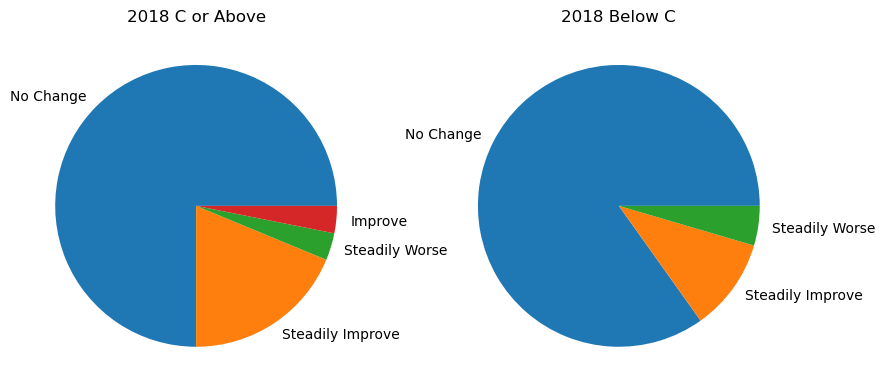

In [107]:
df_wide1 = df_wide[df_wide['2018 Grade'] == 'C or Above']
df_wide2 = df_wide[df_wide['2018 Grade'] == 'Below C']

fig1 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig1.add_subplot(121)
cts = df_wide1.improvement.value_counts().to_frame()
ax1.pie(cts.improvement, labels = df_wide1['improvement'].unique())
ax1.set_title('2018 C or Above')
ax1.set_label(df_wide1['improvement'])

ax2 = fig1.add_subplot(122)
cts = df_wide2.improvement.value_counts().to_frame()
ax2.pie(cts.improvement, labels = df_wide2['improvement'].unique())
ax2.set_title('2018 Below C')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()

In [77]:
print(str(len(df_wide1)) + ' c or Above')
print(str(len(df_wide2)) + ' Below C')

33 c or Above
70 Below C


### Performance Index

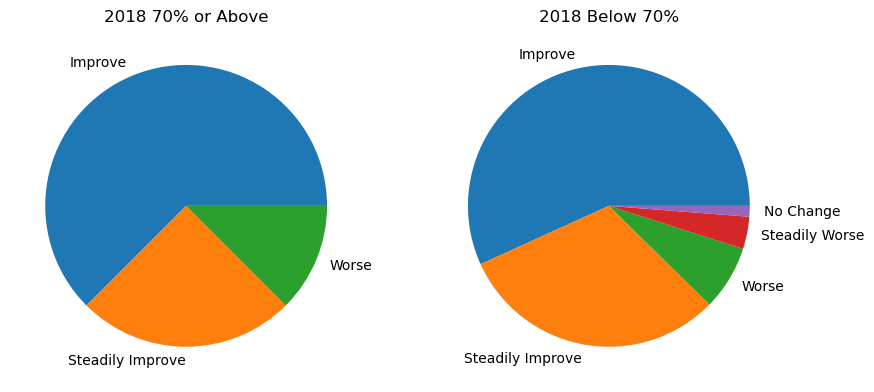

In [108]:
#performance
df_wide_per1 = df_wide_per[df_wide_per['2018 Grade'] == 'C or Above']
df_wide_per2 = df_wide_per[df_wide_per['2018 Grade'] == 'Below C']

fig2 = plt.figure(figsize=(10,5))
# ax = fig1.add_subplot(111)
ax1 =fig2.add_subplot(121)
cts = df_wide_per1.improvement.value_counts().to_frame()
ax1.pie(cts.improvement, labels = df_wide_per1['improvement'].unique())
ax1.set_title('2018 70% or Above')
ax1.set_label(df_wide_per1['improvement'])

ax2 = fig2.add_subplot(122)
cts = df_wide_per2.improvement.value_counts().to_frame()
ax2.pie(cts.improvement, labels = df_wide_per2['improvement'].unique())
ax2.set_title('2018 Below 70%')

# plt.set_title('Value Added Grade 2015-2018')
plt.show()


In [80]:
print(str(len(df_wide_per1)) + ' 70% or Above')
print(str(len(df_wide_per2)) + ' Below 70%')

8 70% or Above
83 Below 70%


### export dfs for map

In [112]:
VA_map_df = df_wide2
Perf_map_df = df_wide_per2

In [119]:
writer = pd.ExcelWriter("visuals_dataset.xlsx", engine="xlsxwriter")
df_wide1.to_excel(writer, sheet_name="VA_C_above")
VA_map_df.to_excel(writer, sheet_name="VA_under_C")
df_wide_per1.to_excel(writer, sheet_name="Perf_C_above")
Perf_map_df.to_excel(writer, sheet_name="Perf_under_c")
writer.close()